In [10]:
import face_recognition
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from dgzc.dataset import DGZCAutoEncoderDataset, DGZCClassifierDataset, DGZCInferenceDataset
from dgzc.autoencoder import Encoder, Decoder, AutoEncoderFaceImages
from dgzc.classifier import ClassificationBackbone, AutoEncoderClassifierAmalgamation

from torch.utils.data import DataLoader
import torch.nn as nn
import torchsummary
import torch

In [2]:
data_path = "/home/shivam/2021-22-2/ML4CE/Assignments/Assignment3/Driver-Gaze-Zone-Classification/data/gaze_dataset"
dataset_auto_enc = DGZCAutoEncoderDataset(data_path, size=(200, 200))
# dataset_classifier = DGZCClassifierDataset(data_path, size=(200, 200))
# dataset_inference = DGZCInferenceDataset(data_path, size=(200, 200))

In [3]:
dataloader = DataLoader(dataset_classifier, batch_size = 20, shuffle = True, num_workers=4)

In [6]:
sample_data, target = iter(dataloader).next()

In [7]:
sample_data.size()

torch.Size([20, 3, 200, 200])

In [8]:
model = AutoEncoderClassifierAmalgamation()
model.to('cuda')

AutoEncoderClassifierAmalgamation(
  (encoder): Encoder(
    (conv1): Conv2DNormActivation(
      (0): Conv2d(3, 5, kernel_size=(5, 5), stride=(2, 2))
      (1): SELU(inplace=True)
    )
    (conv2): Conv2DNormActivation(
      (0): Conv2d(5, 10, kernel_size=(5, 5), stride=(1, 1), bias=False)
      (1): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SELU(inplace=True)
    )
    (max_pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv3): Conv2DNormActivation(
      (0): Conv2d(10, 20, kernel_size=(3, 3), stride=(1, 1))
      (1): SELU(inplace=True)
    )
    (conv4): Conv2DNormActivation(
      (0): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1))
      (1): SELU(inplace=True)
    )
    (conv5): Conv2DNormActivation(
      (0): Conv2d(20, 30, kernel_size=(3, 3), stride=(1, 1), bias=False)
      (1): BatchNorm2d(30, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SELU(inplace=

In [9]:
torchsummary.summary(model, (3, 200, 200))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 5, 98, 98]             380
              SELU-2            [-1, 5, 98, 98]               0
            Conv2d-3           [-1, 10, 94, 94]           1,250
       BatchNorm2d-4           [-1, 10, 94, 94]              20
              SELU-5           [-1, 10, 94, 94]               0
         MaxPool2d-6           [-1, 10, 47, 47]               0
            Conv2d-7           [-1, 20, 45, 45]           1,820
              SELU-8           [-1, 20, 45, 45]               0
            Conv2d-9           [-1, 20, 43, 43]           3,620
             SELU-10           [-1, 20, 43, 43]               0
           Conv2d-11           [-1, 30, 41, 41]           5,400
      BatchNorm2d-12           [-1, 30, 41, 41]              60
             SELU-13           [-1, 30, 41, 41]               0
           Conv2d-14           [-1, 40,

In [8]:
sample_data_ = sample_data.to('cuda')
out_il, out_recon = model(sample_data_)

In [11]:
print(out_il.shape, out_recon.shape)

torch.Size([20, 40, 35, 35]) torch.Size([20, 40, 39, 39])


In [10]:
len(torch.split(sample_data, 10, dim=0))

2

In [11]:
sample_data = sample_data.permute(0, 2, 3, 1)

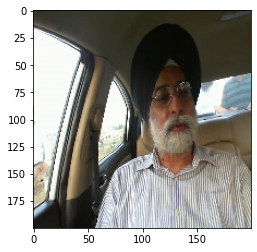

In [15]:
plt.imshow(sample_data[0, ::].numpy()/255.)
plt.show()